<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/Linear_Regression_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
url = "/content/iris.data.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


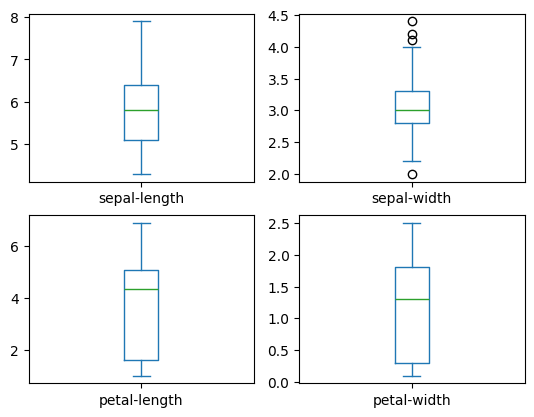

In [ ]:
# layout = (2,2) means 2*2 matrix form
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

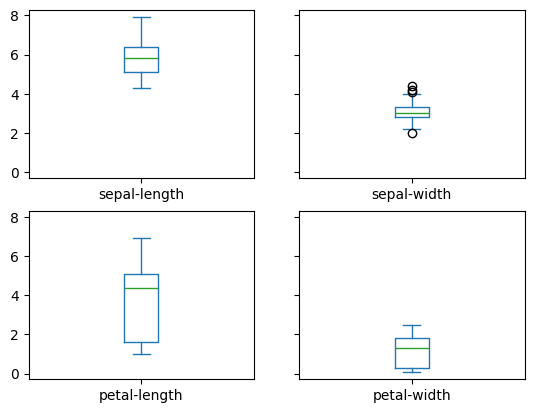

In [ ]:
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = True, sharey = True)
plt.show()

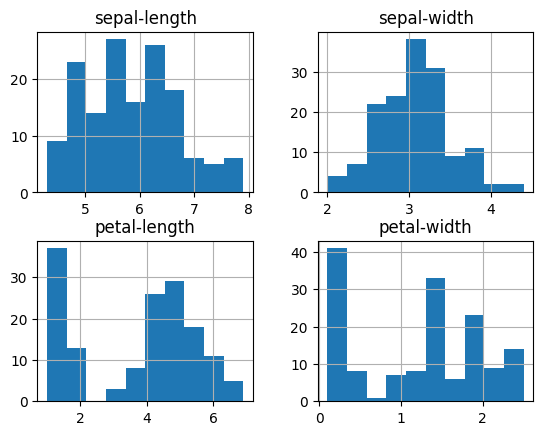

In [ ]:
dataset.hist()
plt.show()

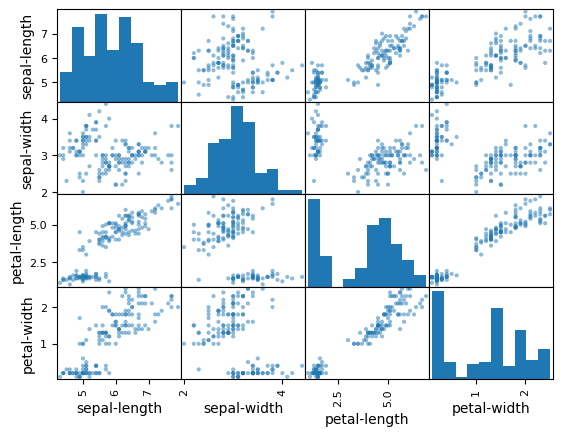

In [ ]:
scatter_matrix(dataset)
plt.show()

In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [ ]:
seed = 6
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


In [ ]:
# Linear Regression(It is a type of supervised ML algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets)
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
disease = datasets.load_diabetes()
disease_x = disease.data[:, np.newaxis, 2]
disease_x_train = disease_x[:-30]
disease_x_test = disease_x[-20:]
disease_y_train = disease.target[:-30]
disease_y_test = disease.target[-20:]
reg = linear_model.LinearRegression()
reg.fit(disease_x_train, disease_y_train)

LinearRegression()

In [ ]:
y_predict = reg.predict(disease_x_test)
accuracy = mean_squared_error(disease_y_test, y_predict)
print(accuracy)
weights = reg.coef_
print(weights)
intercept = reg.intercept_
print(intercept)

2561.3204277283853
[941.43097333]
153.39713623331644


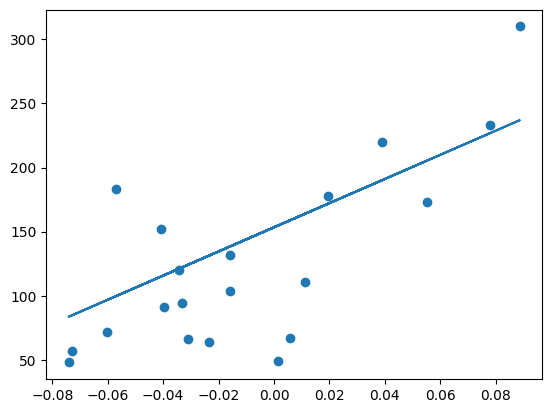

In [ ]:
plt.scatter(disease_x_test, disease_y_test)
plt.plot(disease_x_test, y_predict)
plt.show()

In [ ]:
cars = pd.read_csv("/content/cars.csv")
print(cars.head())

   age  gender  miles   debt  income  sales
0   28       0     23      0    4099    620
1   26       0     27      0    2677   1792
2   30       1     58  41576    6215  27754
3   26       1     25  43172    7626  28256
4   20       1     17   6979    8071   4438


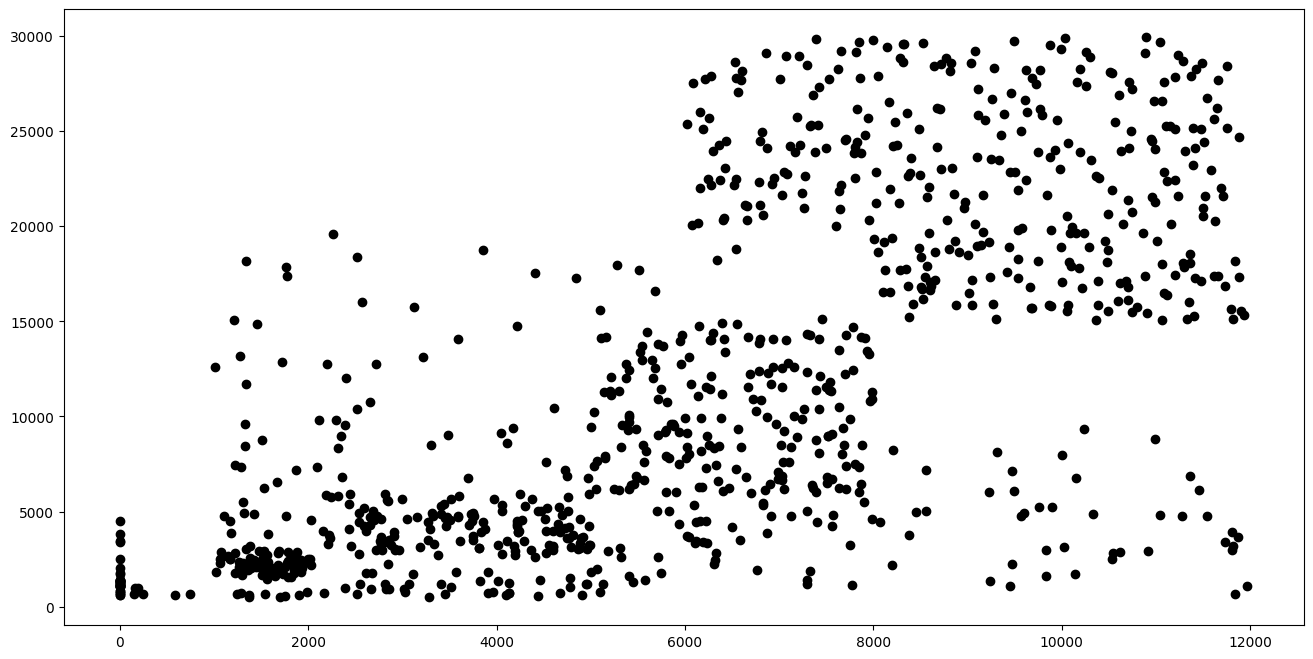

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(
    cars['income'], cars['sales'], c = 'black'
)
plt.xlabel = ('income')
plt.ylabel = ('sales')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
x = cars['income'].values.reshape(-1,1)
y = cars['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x,y)
print(reg.coef_[0][0])
print(reg.intercept_[0])

1.8595344527631772
205.2872461262814


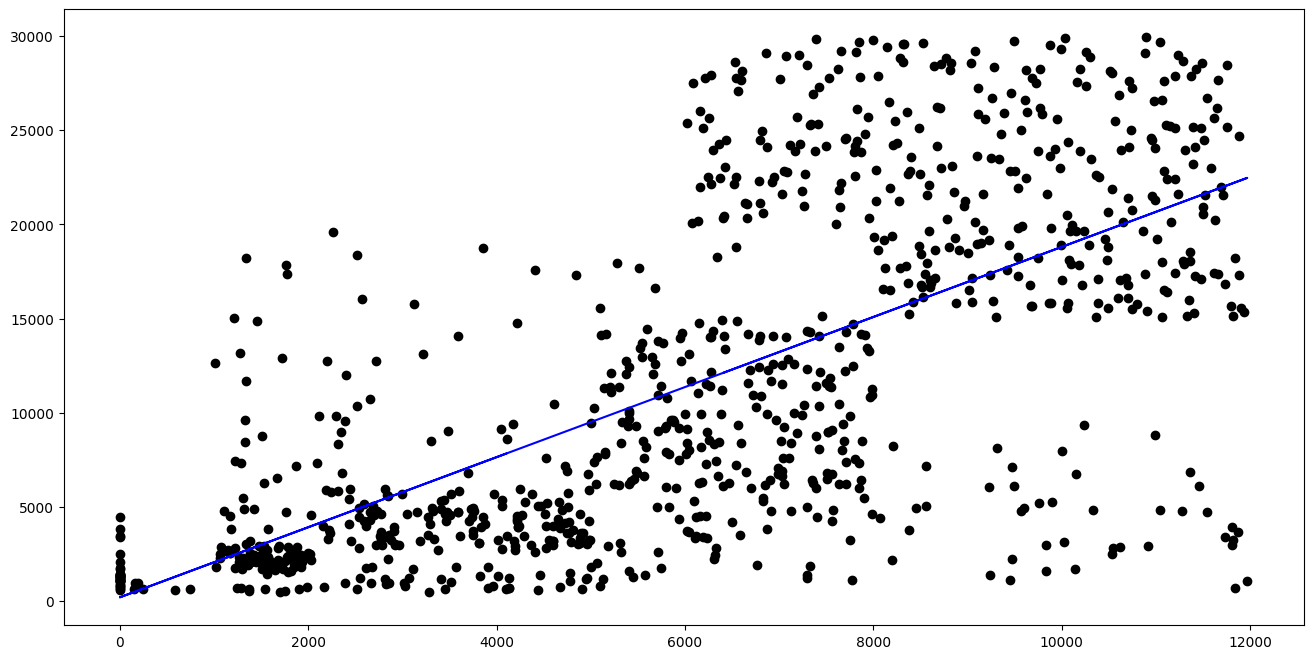

In [ ]:
predictions = reg.predict(x)
plt.figure(figsize = (16,8))
plt.scatter(
    cars['income'], cars['sales'], c = 'black'
)
plt.plot(
    cars['income'], predictions, c = 'blue',
)
plt.xlabel = ('income')
plt.ylabel = ('sales')
plt.show()